In [1]:
import math

math.e

2.718281828459045

In [6]:
z = 1 + 5*0.3 - 0.3*3 

sig = 1 / (1 +  math.e**(-z))

round(sig, 2)

0.83

In [4]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

In [3]:
import pandas as pd

data = pd.read_csv('data/task_data.csv')

data = data.drop('SNo', axis=1)

data

,X_1,X_2,y
0,-0.869144,0.389310,0.0
1,-0.993467,-0.610591,0.0
2,-0.834064,0.239236,0.0
3,-0.136471,0.632003,1.0
4,0.403887,0.310784,1.0
...,...,...,...
95,0.531635,-0.479185,1.0
96,-0.650192,0.655303,1.0
97,0.985299,0.118333,1.0
98,-0.275289,0.005730,1.0


In [9]:
X = data.drop('y', axis=1)
y = data['y']

In [17]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации



In [11]:
log_reg_full = linear_model.LogisticRegression(random_state=42, solver='sag', max_iter=1000)

log_reg_full.fit(X,y)

y_predict = log_reg_full.predict(X)

C:\Users\nitys\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


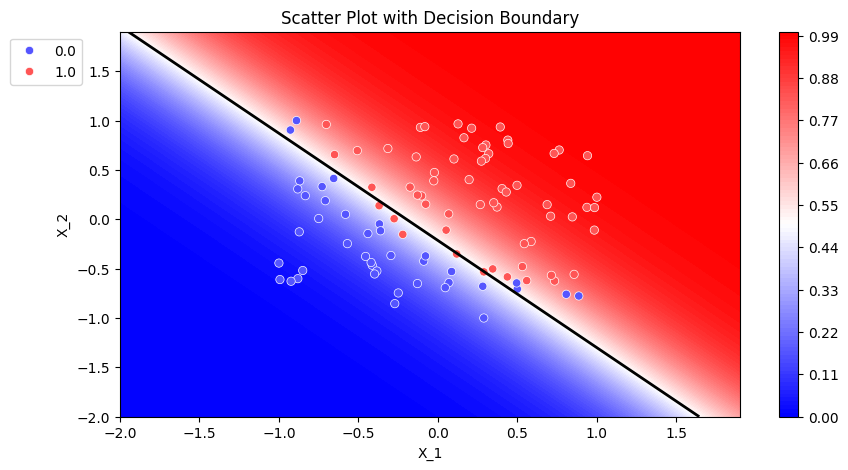

In [18]:
plot_probabilities_2d(X, y, log_reg_full)

In [19]:
from sklearn import metrics

**Задание 3.6**

In [21]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

print(metrics.precision_score(y_true, y_pred))

0.75


**Задание 3.7**

In [22]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

print(metrics.recall_score(y_true, y_pred))

0.6


**Задание 3.8**

In [24]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1] 
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

print(round(metrics.f1_score(y_true, y_pred), 2))

0.67


In [1]:
import pandas as pd

In [5]:
diabetes_data = pd.read_csv('data\diabetes_cleaned.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nitys\AppData\Local\Temp\ipykernel_5828\3826715288.py:1: SyntaxWarning: invalid escape sequence '\d'
  diabetes_data = pd.read_csv('data\diabetes_cleaned.csv')


In [6]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
752,5,139.0,64.0,35.0,28.6,0.411,26,0
753,1,96.0,122.0,29.0,22.4,0.207,27,0
754,10,101.0,86.0,37.0,45.6,1.136,38,1
755,0,141.0,72.0,29.0,42.4,0.205,29,1


In [12]:
from sklearn import tree
from sklearn import metrics

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']



In [15]:
dec_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    random_state=42
)

dec_tree.fit(X, y)


DecisionTreeClassifier(max_depth=6, random_state=42)

In [16]:
y_pred = dec_tree.predict(X)

print(round(metrics.f1_score(y_pred, y), 2))

0.78


In [18]:
wine_data = pd.read_csv('data/winequality-red.csv', sep=';')

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

from sklearn.model_selection import train_test_split
from sklearn import ensemble

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import metrics
import pandas as pd

wine_data = pd.read_csv('data/winequality-red.csv', sep=';')
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x>=6 else 0)
wine_data.head()

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

rf_clf_wine = ensemble.RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_depth=8,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42
    )

rf_clf_wine.fit(X_train, y_train)

y_pred_train_rf = rf_clf_wine.predict(X_train)

y_pred_test_rf = rf_clf_wine.predict(X_test)

print( round(metrics.accuracy_score(y_pred_train_rf, y_train), 2))

print(round(metrics.accuracy_score(y_pred_test_rf, y_test), 2))

0.85
0.75


In [11]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

rf_clf_diabetes = ensemble.RandomForestClassifier(
    n_estimators=500,
    criterion='entropy',
    max_depth=15,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42
    )

rf_clf_diabetes.fit(X, y)

y_pred_diab = rf_clf_diabetes.predict(X)

# y_pred_test_rf = rf_clf_wine.predict(X_test)

print( round(metrics.f1_score(y_pred_diab, y), 2))

# print(round(metrics.accuracy_score(y_pred_test_rf, y_test), 2))



0.78
